a: 1892.00062384484
d: -30.0803321091676
k: 3.95407152021392
Sigma: 312.197894611666


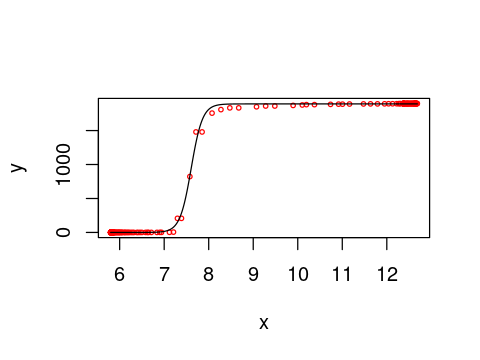

In [42]:
dat=read.csv("MoN200.txt", header=FALSE, stringsAsFactors=TRUE, sep="\t") 
#обрезаем входные данные на участке, который хотим аппрок-ть
x=dat[,1][22941:23212] 
y=dat[,3][22941:23212]

# Размер графика 4 x 3
library(repr)
options(repr.plot.width=4, repr.plot.height=3)

#строим график входных данных
plot(x,y, type="p",col="red", cex=0.5)

# Находим коэффициенты нелинейной модели, задав начальные коэфф-ты
fit5=nls(y~a*(1/(1+exp(-2*(k*x+d)))),start=list(a=1800,d=-34,k=5),trace=FALSE)
a=coef(fit5)[1]
d=coef(fit5)[2]
k=coef(fit5)[3]

# Среднеквадратичное отклонение от модели(sigma=sqrt(D))
sigma=sqrt(sum(resid(fit5)^2))

# Вывод результатов
message(sprintf("a: %s", a))
message(sprintf("d: %s", d))
message(sprintf("k: %s", k))
message(sprintf("Sigma: %s", sigma))

#генерируем эквидистантный массив из 500 элементов на области определения y(x)
xx = seq(min(x),max(x), length=500)

#строим график аппроксимирующей кривой
lines(xx, predict(fit5, data.frame(x=xx)), col="black")


In [31]:
?plot